## Unit 6 | Assignment - What's the Weather Like?

## Background

Whether financial, political, or social -- data's true power lies in its ability to answer questions definitively. So let's take what you've learned about Python requests, APIs, and JSON traversals to answer a fundamental question: "What's the weather like as we approach the equator?"

Now, we know what you may be thinking: _"Duh. It gets hotter..."_ 

But, if pressed, how would you **prove** it? 

![Equator](equatorsign.png)

## WeatherPy

In this example, you'll be creating a Python script to visualize the weather of 500+ cities across the world of varying distance from the equator. To accomplish this, you'll be utilizing a [simple Python library](https://pypi.python.org/pypi/citipy), the [OpenWeatherMap API](https://openweathermap.org/api), and a little common sense to create a representative model of weather across world cities.

Your objective is to build a series of scatter plots to showcase the following relationships:

* Temperature (F) vs. Latitude
* Humidity (%) vs. Latitude
* Cloudiness (%) vs. Latitude
* Wind Speed (mph) vs. Latitude

Your final notebook must:

* Randomly select **at least** 500 unique (non-repeat) cities based on latitude and longitude.
* Perform a weather check on each of the cities using a series of successive API calls. 
* Include a print log of each city as it's being processed with the city number, city name, and requested URL.
* Save both a CSV of all data retrieved and png images for each scatter plot.

As final considerations:

* You must use the Matplotlib and Seaborn libraries.
* You must include a written description of three observable trends based on the data. 
* You must use proper labeling of your plots, including aspects like: Plot Titles (with date of analysis) and Axes Labels.
* You must include an exported markdown version of your Notebook called  `README.md` in your GitHub repository.  
* See [Example Solution](WeatherPy_Example.pdf) for a reference on expected format. 

## Hints and Considerations

* You may want to start this assignment by refreshing yourself on 4th grade geography, in particular, the [geographic coordinate system](http://desktop.arcgis.com/en/arcmap/10.3/guide-books/map-projections/about-geographic-coordinate-systems.htm). 

* Next, spend the requisite time necessary to study the OpenWeatherMap API. Based on your initial study, you should be able to answer  basic questions about the API: Where do you request the API key? Which Weather API in particular will you need? What URL endpoints does it expect? What JSON structure does it respond with? Before you write a line of code, you should be aiming to have a crystal clear understanding of your intended outcome.

* Though we've never worked with the [citipy Python library](https://pypi.python.org/pypi/citipy), push yourself to decipher how it works, and why it might be relevant. Before you try to incorporate the library into your analysis, start by creating simple test cases outside your main script to confirm that you are using it correctly. Too often, when introduced to a new library, students get bogged down by the most minor of errors -- spending hours investigating their entire code -- when, in fact, a simple and focused test would have shown their basic utilization of the library was wrong from the start. Don't let this be you!

* Part of our expectation in this challenge is that you will use critical thinking skills to understand how and why we're recommending the tools we are. What is Citipy for? Why would you use it in conjunction with the OpenWeatherMap API? How would you do so?

* In building your script, pay attention to the cities you are using in your query pool. Are you getting coverage of the full gamut of latitudes and longitudes? Or are you simply choosing 500 cities concentrated in one region of the world? Even if you were a geographic genius, simply rattling 500 cities based on your human selection would create a biased dataset. Be thinking of how you should counter this. (Hint: Consider the full range of latitudes).

* Lastly, remember -- this is a challenging activity. Push yourself! If you complete this task, then you can safely say that you've gained a strong mastery of the core foundations of data analytics and it will only go better from here. Good luck!

## Copyright

Coding Boot Camp (C) 2016. All Rights Reserved.

<h1>WeatherPy</h1>
<h2>Analysis</h2>
<ul>
    <li>The temperature for the tropical regions between the Tropic of Cancer and Tropic of Capricorn are warm, with temperatures between 60 and 100 Fahrenheit.  In the temperate zone north of the Tropic of Cancer, the temperature is colder as you approach the Arctic Circle.  This does not occur in the southern hemisphere because this area is mostly ocean.
</li>
    <li>For March 13, 2018, the temperature at the University of Southern California was between 60 and 70 Fahrenheit.  This is consistent for being in a temperate zone but closer to the Tropic of Cancer than the Arctic Circle.</li>
    <li>The warmest temperature was between the Equator and Tropic of Cancer at about 105 Fahrenheit.  The coldest temperatures where below -30 Fahrenheit near the Arctic Circle.</li>
</ul>

In [1]:
# Dependencies
import json
import requests
import pandas as pd
import csv
import random
import matplotlib.pyplot as plt
import numpy as np
import config
import datetime
import time

<class 'list'>


<h2>Generate Cities List</h2>

In [2]:
# Create a reference the CSV file desired
csv_path = "worldcities.csv"

# Read the CSV into a Pandas DataFrame
df = pd.read_csv(csv_path)

# Print the first five rows of data to the screen
df.head()

df = df.dropna(how="any")

df.count()

Country      46831
City         46831
Latitude     46831
Longitude    46831
dtype: int64

In [3]:
# Randomly select city names.
city_list = list(df.loc[:,'City'])

random_cities = random.sample(city_list, 2000)

random_cities.insert(0, 'los angeles') # Get the weather for USC.

# print(json.dumps(random_cities, indent=4, sort_keys=True))

<h2>Perform API Calls</h2>

In [21]:
# Get random weather.
    
accepted_records = 0
    
random_weathers = {}

city_limit = 600
    
url = "http://api.openweathermap.org/data/2.5/weather?"
    
api_keys = config.api_keys
api_index = 0


    
for city_name in random_cities:

    random_weather = {}
    
    query_url = "{0}appid={1}&q={2}&units=imperial".format(url,api_keys[api_index],city_name)

    weather_response = None

    weather_response = requests.get(query_url)
    
    if weather_response is None:
        print("Request returned nothing.  Changing API key.")
        api_index = api_index + 1
        continue

    if weather_response.status_code == 404:
        print('\n404', city_name, "was not found.", "\n", query_url)
        continue
    weather_json = weather_response.json()
    
    if weather_response.status_code == 200:
        pass
    else:
        print("Unexpected status code:", str(weather_response.status_code))

    try:
        if city_name == weather_json.get('name').lower():
            pass
        else:
            print("city_name ", city_name, "did not match", weather_json.get('name').lower())
            break
            
        random_weather['Max Temp'] = weather_json.get('main').get('temp_max')
        random_weather['Humidity'] = weather_json.get('main').get('humidity')
        random_weather['Lng'] = weather_json.get('coord').get('lon')
        random_weather['Lat'] = weather_json.get('coord').get('lat')
        random_weather['Date'] = str(weather_json.get('dt'))
        random_weather['Cloudiness'] = weather_json.get('clouds').get('all')
        random_weather['Country'] = weather_json.get('sys').get('country')
        random_weather['Wind Speed'] = weather_json.get('wind').get('speed')
        accepted_records = accepted_records + 1
        print("\n", str(weather_response.status_code), str(accepted_records), city_name, "\n", query_url)
        random_weathers[city_name] = random_weather
        if accepted_records >= city_limit:
            break

    except AttributeError:
        print(city_name, "had an AttributeError")
        continue   
        


 200 1 los angeles 
 http://api.openweathermap.org/data/2.5/weather?appid=58ed8ba18463655361304e30941eebf0&q=los angeles&units=imperial

 200 2 sankt jakob 
 http://api.openweathermap.org/data/2.5/weather?appid=58ed8ba18463655361304e30941eebf0&q=sankt jakob&units=imperial

 200 3 dalsingh sarai 
 http://api.openweathermap.org/data/2.5/weather?appid=58ed8ba18463655361304e30941eebf0&q=dalsingh sarai&units=imperial

 200 4 sar-e pul 
 http://api.openweathermap.org/data/2.5/weather?appid=58ed8ba18463655361304e30941eebf0&q=sar-e pul&units=imperial

404 unye was not found. 
 http://api.openweathermap.org/data/2.5/weather?appid=58ed8ba18463655361304e30941eebf0&q=unye&units=imperial

 200 5 liti 
 http://api.openweathermap.org/data/2.5/weather?appid=58ed8ba18463655361304e30941eebf0&q=liti&units=imperial

 200 6 garanhuns 
 http://api.openweathermap.org/data/2.5/weather?appid=58ed8ba18463655361304e30941eebf0&q=garanhuns&units=imperial

 200 7 domont 
 http://api.openweathermap.org/data/2.5/wea


 200 61 bridgewater 
 http://api.openweathermap.org/data/2.5/weather?appid=58ed8ba18463655361304e30941eebf0&q=bridgewater&units=imperial

 200 62 yertsevo 
 http://api.openweathermap.org/data/2.5/weather?appid=58ed8ba18463655361304e30941eebf0&q=yertsevo&units=imperial

 200 63 kulgam 
 http://api.openweathermap.org/data/2.5/weather?appid=58ed8ba18463655361304e30941eebf0&q=kulgam&units=imperial

 200 64 agde 
 http://api.openweathermap.org/data/2.5/weather?appid=58ed8ba18463655361304e30941eebf0&q=agde&units=imperial

 200 65 de land 
 http://api.openweathermap.org/data/2.5/weather?appid=58ed8ba18463655361304e30941eebf0&q=de land&units=imperial

 200 66 cernay 
 http://api.openweathermap.org/data/2.5/weather?appid=58ed8ba18463655361304e30941eebf0&q=cernay&units=imperial

 200 67 sonipat 
 http://api.openweathermap.org/data/2.5/weather?appid=58ed8ba18463655361304e30941eebf0&q=sonipat&units=imperial

 200 68 quipapa 
 http://api.openweathermap.org/data/2.5/weather?appid=58ed8ba18463655361


 200 121 kamenz 
 http://api.openweathermap.org/data/2.5/weather?appid=58ed8ba18463655361304e30941eebf0&q=kamenz&units=imperial

 200 122 wharton 
 http://api.openweathermap.org/data/2.5/weather?appid=58ed8ba18463655361304e30941eebf0&q=wharton&units=imperial

 200 123 araruna 
 http://api.openweathermap.org/data/2.5/weather?appid=58ed8ba18463655361304e30941eebf0&q=araruna&units=imperial

 200 124 altamira 
 http://api.openweathermap.org/data/2.5/weather?appid=58ed8ba18463655361304e30941eebf0&q=altamira&units=imperial

 200 125 deori khas 
 http://api.openweathermap.org/data/2.5/weather?appid=58ed8ba18463655361304e30941eebf0&q=deori khas&units=imperial

 200 126 kunjah 
 http://api.openweathermap.org/data/2.5/weather?appid=58ed8ba18463655361304e30941eebf0&q=kunjah&units=imperial

 200 127 bued 
 http://api.openweathermap.org/data/2.5/weather?appid=58ed8ba18463655361304e30941eebf0&q=bued&units=imperial

 200 128 markdale 
 http://api.openweathermap.org/data/2.5/weather?appid=58ed8ba1846


404 bolonchen was not found. 
 http://api.openweathermap.org/data/2.5/weather?appid=58ed8ba18463655361304e30941eebf0&q=bolonchen&units=imperial

 200 176 sercaia 
 http://api.openweathermap.org/data/2.5/weather?appid=58ed8ba18463655361304e30941eebf0&q=sercaia&units=imperial

 200 177 voyskovitsy 
 http://api.openweathermap.org/data/2.5/weather?appid=58ed8ba18463655361304e30941eebf0&q=voyskovitsy&units=imperial

 200 178 calamar 
 http://api.openweathermap.org/data/2.5/weather?appid=58ed8ba18463655361304e30941eebf0&q=calamar&units=imperial

 200 179 raisio 
 http://api.openweathermap.org/data/2.5/weather?appid=58ed8ba18463655361304e30941eebf0&q=raisio&units=imperial

 200 180 frameries 
 http://api.openweathermap.org/data/2.5/weather?appid=58ed8ba18463655361304e30941eebf0&q=frameries&units=imperial

 200 181 vanatori 
 http://api.openweathermap.org/data/2.5/weather?appid=58ed8ba18463655361304e30941eebf0&q=vanatori&units=imperial

 200 182 terre rouge 
 http://api.openweathermap.org/dat


 200 232 humberto de campos 
 http://api.openweathermap.org/data/2.5/weather?appid=58ed8ba18463655361304e30941eebf0&q=humberto de campos&units=imperial

 200 233 kabul 
 http://api.openweathermap.org/data/2.5/weather?appid=58ed8ba18463655361304e30941eebf0&q=kabul&units=imperial

 200 234 dillon 
 http://api.openweathermap.org/data/2.5/weather?appid=58ed8ba18463655361304e30941eebf0&q=dillon&units=imperial

 200 235 dailly 
 http://api.openweathermap.org/data/2.5/weather?appid=58ed8ba18463655361304e30941eebf0&q=dailly&units=imperial

 200 236 oia 
 http://api.openweathermap.org/data/2.5/weather?appid=58ed8ba18463655361304e30941eebf0&q=oia&units=imperial

 200 237 jarrow 
 http://api.openweathermap.org/data/2.5/weather?appid=58ed8ba18463655361304e30941eebf0&q=jarrow&units=imperial

 200 238 jalpan 
 http://api.openweathermap.org/data/2.5/weather?appid=58ed8ba18463655361304e30941eebf0&q=jalpan&units=imperial

 200 239 yachihuacaltepec 
 http://api.openweathermap.org/data/2.5/weather?appid


 200 291 stephenville 
 http://api.openweathermap.org/data/2.5/weather?appid=58ed8ba18463655361304e30941eebf0&q=stephenville&units=imperial

 200 292 de bilt 
 http://api.openweathermap.org/data/2.5/weather?appid=58ed8ba18463655361304e30941eebf0&q=de bilt&units=imperial

 200 293 kuressaare 
 http://api.openweathermap.org/data/2.5/weather?appid=58ed8ba18463655361304e30941eebf0&q=kuressaare&units=imperial

 200 294 kisangani 
 http://api.openweathermap.org/data/2.5/weather?appid=58ed8ba18463655361304e30941eebf0&q=kisangani&units=imperial

 200 295 orotina 
 http://api.openweathermap.org/data/2.5/weather?appid=58ed8ba18463655361304e30941eebf0&q=orotina&units=imperial

 200 296 lang suan 
 http://api.openweathermap.org/data/2.5/weather?appid=58ed8ba18463655361304e30941eebf0&q=lang suan&units=imperial

 200 297 tisnov 
 http://api.openweathermap.org/data/2.5/weather?appid=58ed8ba18463655361304e30941eebf0&q=tisnov&units=imperial

 200 298 kedrovyy 
 http://api.openweathermap.org/data/2.5/w


 200 347 raditsa-krylovka 
 http://api.openweathermap.org/data/2.5/weather?appid=58ed8ba18463655361304e30941eebf0&q=raditsa-krylovka&units=imperial

404 urulga was not found. 
 http://api.openweathermap.org/data/2.5/weather?appid=58ed8ba18463655361304e30941eebf0&q=urulga&units=imperial

 200 348 ano poroia 
 http://api.openweathermap.org/data/2.5/weather?appid=58ed8ba18463655361304e30941eebf0&q=ano poroia&units=imperial

 200 349 noyabrsk 
 http://api.openweathermap.org/data/2.5/weather?appid=58ed8ba18463655361304e30941eebf0&q=noyabrsk&units=imperial

 200 350 santandrei 
 http://api.openweathermap.org/data/2.5/weather?appid=58ed8ba18463655361304e30941eebf0&q=santandrei&units=imperial

 200 351 farmington 
 http://api.openweathermap.org/data/2.5/weather?appid=58ed8ba18463655361304e30941eebf0&q=farmington&units=imperial

404 un was not found. 
 http://api.openweathermap.org/data/2.5/weather?appid=58ed8ba18463655361304e30941eebf0&q=un&units=imperial

 200 352 serenje 
 http://api.openwe


 200 402 aguada de pasajeros 
 http://api.openweathermap.org/data/2.5/weather?appid=58ed8ba18463655361304e30941eebf0&q=aguada de pasajeros&units=imperial

 200 403 ortakoy 
 http://api.openweathermap.org/data/2.5/weather?appid=58ed8ba18463655361304e30941eebf0&q=ortakoy&units=imperial

404 segalstad was not found. 
 http://api.openweathermap.org/data/2.5/weather?appid=58ed8ba18463655361304e30941eebf0&q=segalstad&units=imperial

 200 404 radhanpur 
 http://api.openweathermap.org/data/2.5/weather?appid=58ed8ba18463655361304e30941eebf0&q=radhanpur&units=imperial

 200 405 mezinovskiy 
 http://api.openweathermap.org/data/2.5/weather?appid=58ed8ba18463655361304e30941eebf0&q=mezinovskiy&units=imperial

 200 406 lessines 
 http://api.openweathermap.org/data/2.5/weather?appid=58ed8ba18463655361304e30941eebf0&q=lessines&units=imperial

 200 407 dobrokoz 
 http://api.openweathermap.org/data/2.5/weather?appid=58ed8ba18463655361304e30941eebf0&q=dobrokoz&units=imperial

 200 408 oktyabrskoye 
 http


 200 456 wesel 
 http://api.openweathermap.org/data/2.5/weather?appid=58ed8ba18463655361304e30941eebf0&q=wesel&units=imperial

404 sapapalii was not found. 
 http://api.openweathermap.org/data/2.5/weather?appid=58ed8ba18463655361304e30941eebf0&q=sapapalii&units=imperial

 200 457 winfield 
 http://api.openweathermap.org/data/2.5/weather?appid=58ed8ba18463655361304e30941eebf0&q=winfield&units=imperial

 200 458 uirauna 
 http://api.openweathermap.org/data/2.5/weather?appid=58ed8ba18463655361304e30941eebf0&q=uirauna&units=imperial

 200 459 kirchbichl 
 http://api.openweathermap.org/data/2.5/weather?appid=58ed8ba18463655361304e30941eebf0&q=kirchbichl&units=imperial

 200 460 velingrad 
 http://api.openweathermap.org/data/2.5/weather?appid=58ed8ba18463655361304e30941eebf0&q=velingrad&units=imperial

 200 461 khambhaliya 
 http://api.openweathermap.org/data/2.5/weather?appid=58ed8ba18463655361304e30941eebf0&q=khambhaliya&units=imperial

 200 462 ardatov 
 http://api.openweathermap.org/dat


 200 512 canoas 
 http://api.openweathermap.org/data/2.5/weather?appid=58ed8ba18463655361304e30941eebf0&q=canoas&units=imperial

 200 513 denton 
 http://api.openweathermap.org/data/2.5/weather?appid=58ed8ba18463655361304e30941eebf0&q=denton&units=imperial

 200 514 tulnici 
 http://api.openweathermap.org/data/2.5/weather?appid=58ed8ba18463655361304e30941eebf0&q=tulnici&units=imperial

 200 515 tiszakeszi 
 http://api.openweathermap.org/data/2.5/weather?appid=58ed8ba18463655361304e30941eebf0&q=tiszakeszi&units=imperial

 200 516 zlonice 
 http://api.openweathermap.org/data/2.5/weather?appid=58ed8ba18463655361304e30941eebf0&q=zlonice&units=imperial

 200 517 santa vitoria do palmar 
 http://api.openweathermap.org/data/2.5/weather?appid=58ed8ba18463655361304e30941eebf0&q=santa vitoria do palmar&units=imperial

 200 518 adancata 
 http://api.openweathermap.org/data/2.5/weather?appid=58ed8ba18463655361304e30941eebf0&q=adancata&units=imperial

 200 519 pasco 
 http://api.openweathermap.org


 200 572 cleveland heights 
 http://api.openweathermap.org/data/2.5/weather?appid=58ed8ba18463655361304e30941eebf0&q=cleveland heights&units=imperial

 200 573 tselina 
 http://api.openweathermap.org/data/2.5/weather?appid=58ed8ba18463655361304e30941eebf0&q=tselina&units=imperial

 200 574 lawang 
 http://api.openweathermap.org/data/2.5/weather?appid=58ed8ba18463655361304e30941eebf0&q=lawang&units=imperial

 200 575 mangaldan 
 http://api.openweathermap.org/data/2.5/weather?appid=58ed8ba18463655361304e30941eebf0&q=mangaldan&units=imperial

 200 576 forio 
 http://api.openweathermap.org/data/2.5/weather?appid=58ed8ba18463655361304e30941eebf0&q=forio&units=imperial

 200 577 kashmor 
 http://api.openweathermap.org/data/2.5/weather?appid=58ed8ba18463655361304e30941eebf0&q=kashmor&units=imperial

 200 578 havant 
 http://api.openweathermap.org/data/2.5/weather?appid=58ed8ba18463655361304e30941eebf0&q=havant&units=imperial

 200 579 bad wildungen 
 http://api.openweathermap.org/data/2.5/we

In [22]:
# Tabulate the random weather.
df_weather = pd.DataFrame(random_weathers)

# Move the city to the row index.
df_weather = df_weather.T

# Move the city index to a column.
df_weather = df_weather.reset_index()

# Rename the index column to city
df_weather = df_weather.rename(columns={"index":"City"})


# Show first five rows.
df_weather.head()


,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,aberchirder,75,GB,1520952600,98,57.56,-2.62,44.6,11.41
1,abut,68,PH,1520955613,80,16.65,120.37,67.81,1.81
2,adancata,75,RO,1520953200,100,47.73,26.3,42.8,6.93
3,agde,0,FR,1520951400,38,43.31,3.47,62.6,9.17
4,aguada de pasajeros,40,CU,1520952600,64,22.38,-80.85,75.2,11.41


In [32]:
# Write weather dataframe to csv file.
df_weather.to_csv("random_weather.csv")

In [23]:
# Start and end dates.
min_date = df_weather['Date'].min()
min_date_str = datetime.datetime.fromtimestamp(int(min_date)).strftime('%Y-%m-%d')

max_date = df_weather['Date'].max()
max_date_str = datetime.datetime.fromtimestamp(int(max_date)).strftime('%Y-%m-%d')

if (min_date_str == max_date_str):
    date_str = min_date_str
else:
    date_str = "{0} through {1}".format(min_date_str, max_date_str)
    
print(date_str)

2018-03-13


In [25]:
# University of Southern California
USC = {}

url = "http://api.openweathermap.org/data/2.5/weather?"

city_name = "los angeles"
country_code = "US"

query_url = "{0}appid={1}&q={2},{3}&units=imperial".format(url, api_keys[5], city_name, country_code)

weather_response = requests.get(query_url)

weather_json = weather_response.json()
    
try:
    USC['Max Temp'] = weather_json.get('main').get('temp_max')
    USC['Humidity'] = weather_json.get('main').get('humidity')
    USC['Lng'] = weather_json.get('coord').get('lon')
    USC['Lat'] = weather_json.get('coord').get('lat')
    USC['Date'] = str(weather_json.get('dt'))
    USC['Cloudiness'] = weather_json.get('clouds').get('all')
    USC['Country'] = weather_json.get('sys').get('country')
    USC['Wind Speed'] = weather_json.get('wind').get('speed')
except AttributeError:
    print(city_name, "was rejected. #############################")
    
print(json.dumps(USC, indent=4, sort_keys=True))       

{
    "Cloudiness": 90,
    "Country": "US",
    "Date": "1520953440",
    "Humidity": 82,
    "Lat": 34.05,
    "Lng": -118.24,
    "Max Temp": 60.8,
    "Wind Speed": 0.47
}


<h2>Latitude vs Temperature Plot</h2>

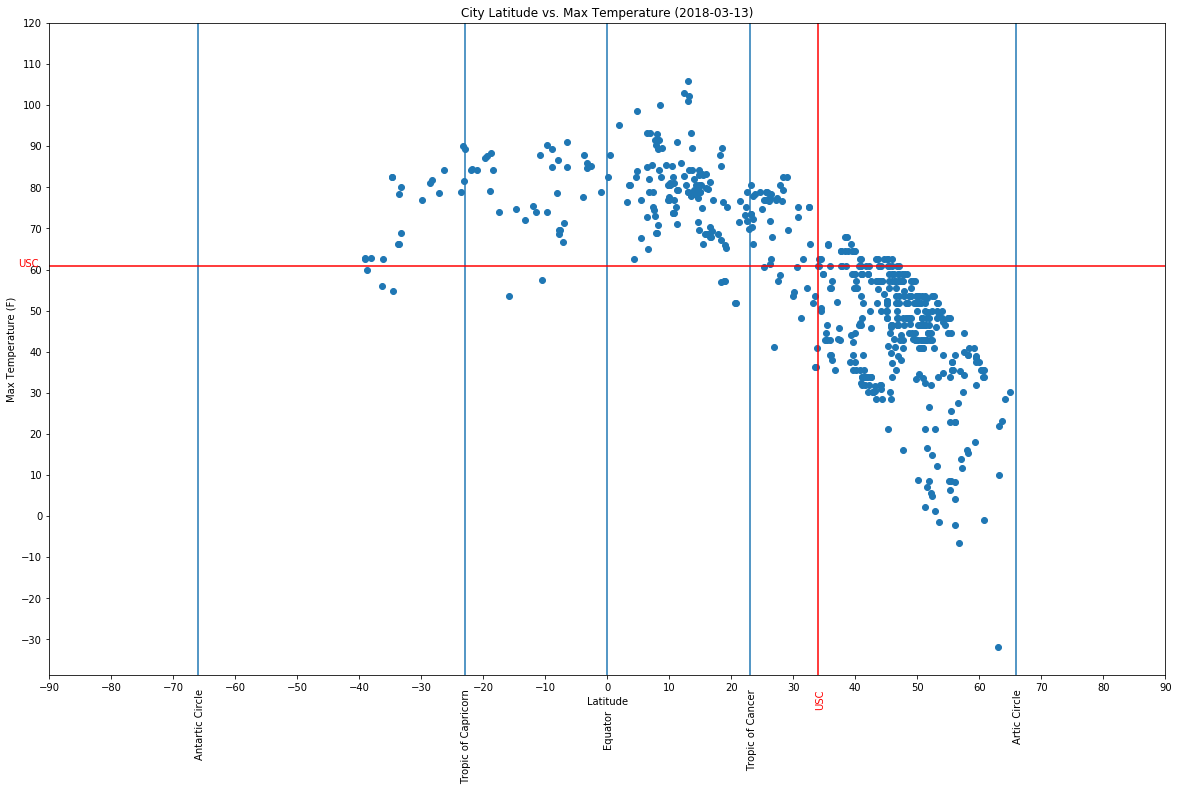

In [28]:
plt.figure(figsize=(20,12))
x_axis = list(df_weather['Lat'])
y_axis = list(df_weather['Max Temp'])
plt.scatter(x_axis, y_axis)

# Format axis
plt.xticks(np.arange(-90,100,10))
plt.yticks(np.arange(-30,130,10))

# Format labels
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.title('City Latitude vs. Max Temperature (' + date_str + ')')


# Draw major latitudes.
xcoords = [66, 23, 0, -23, -66]
for xc in xcoords:
    plt.axvline(x=xc)  
vertical_location = -44
plt.text(65.5,vertical_location, 'Artic Circle', rotation=90)
plt.text(22.5,vertical_location, 'Tropic of Cancer', rotation=90)
plt.text(-0.5,vertical_location, 'Equator       ', rotation=90)
plt.text(-23.5,vertical_location, 'Tropic of Capricorn', rotation=90)
plt.text(-66.5,vertical_location, 'Antartic Circle', rotation=90)

# University of Southern California
plt.axvline(USC.get('Lat'), color='red')    
plt.text(USC.get('Lat') - 0.5, vertical_location, 'USC', rotation=90, color='red')
plt.axhline(USC.get('Max Temp'), color='red')
plt.text(-95, USC.get('Max Temp') -0.1, 'USC', color='red')


plt.show()

<h2>Latitude vs. Humidity Plot

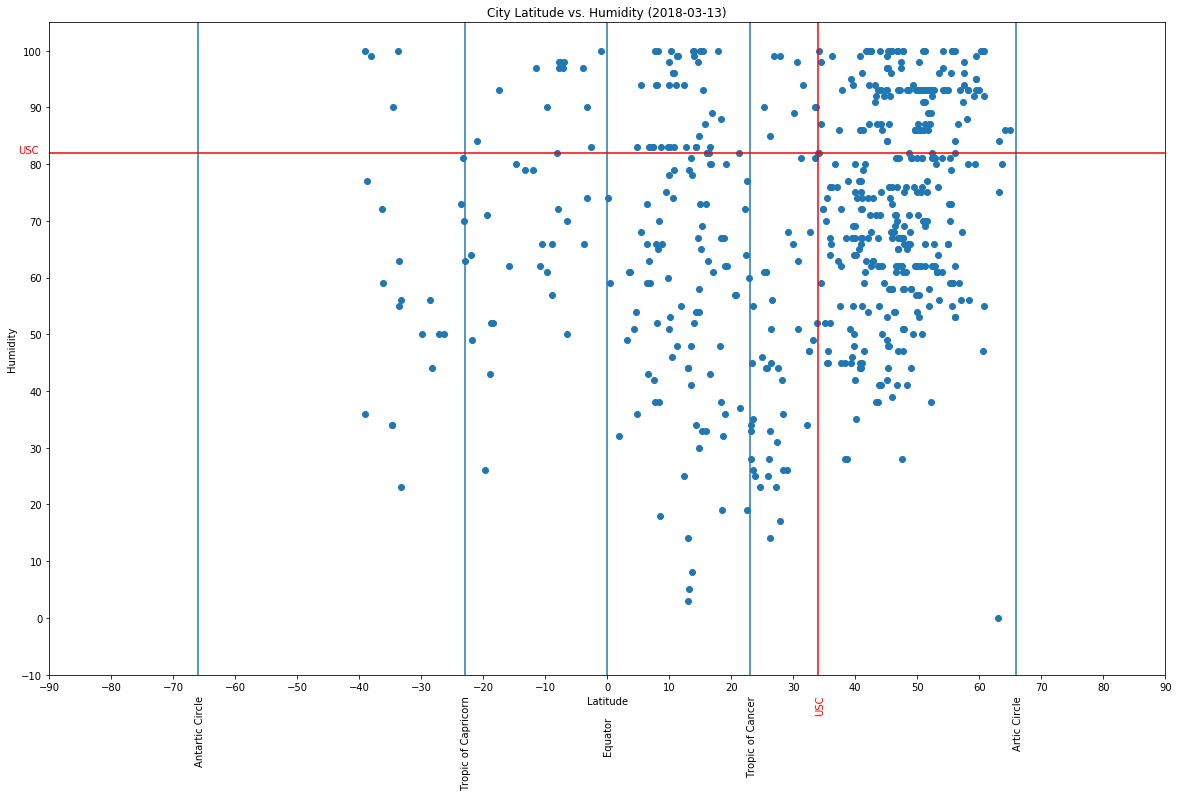

In [29]:
plt.figure(figsize=(20,12))
x_axis = list(df_weather['Lat'])
y_axis = list(df_weather['Humidity'])
plt.scatter(x_axis, y_axis)

# Format axis.
plt.xticks(np.arange(-90,100,10))
plt.yticks(np.arange(-10, 110, 10))

# Add labels
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.title('City Latitude vs. Humidity (' + date_str + ')')



# Draw major latitudes.
xcoords = [66, 23, 0, -23, -66]
for xc in xcoords:
    plt.axvline(x=xc)    
plt.text(65.5,-15, 'Artic Circle', rotation=90)
plt.text(22.5,-15, 'Tropic of Cancer', rotation=90)
plt.text(-0.5,-15, 'Equator       ', rotation=90)
plt.text(-23.5,-15, 'Tropic of Capricorn', rotation=90)
plt.text(-66.5,-15, 'Antartic Circle', rotation=90)

# University of Southern California
plt.axvline(USC.get('Lat'), color='red')    
plt.text(USC.get('Lat') - 0.5, -15, 'USC', rotation=90, color='red')
plt.axhline(USC.get('Humidity'), color='red')
plt.text(-95, USC.get('Humidity') -0.1, 'USC', color='red')


plt.show()

<h2>Latitude vs. Cloudiness Plot</h2>

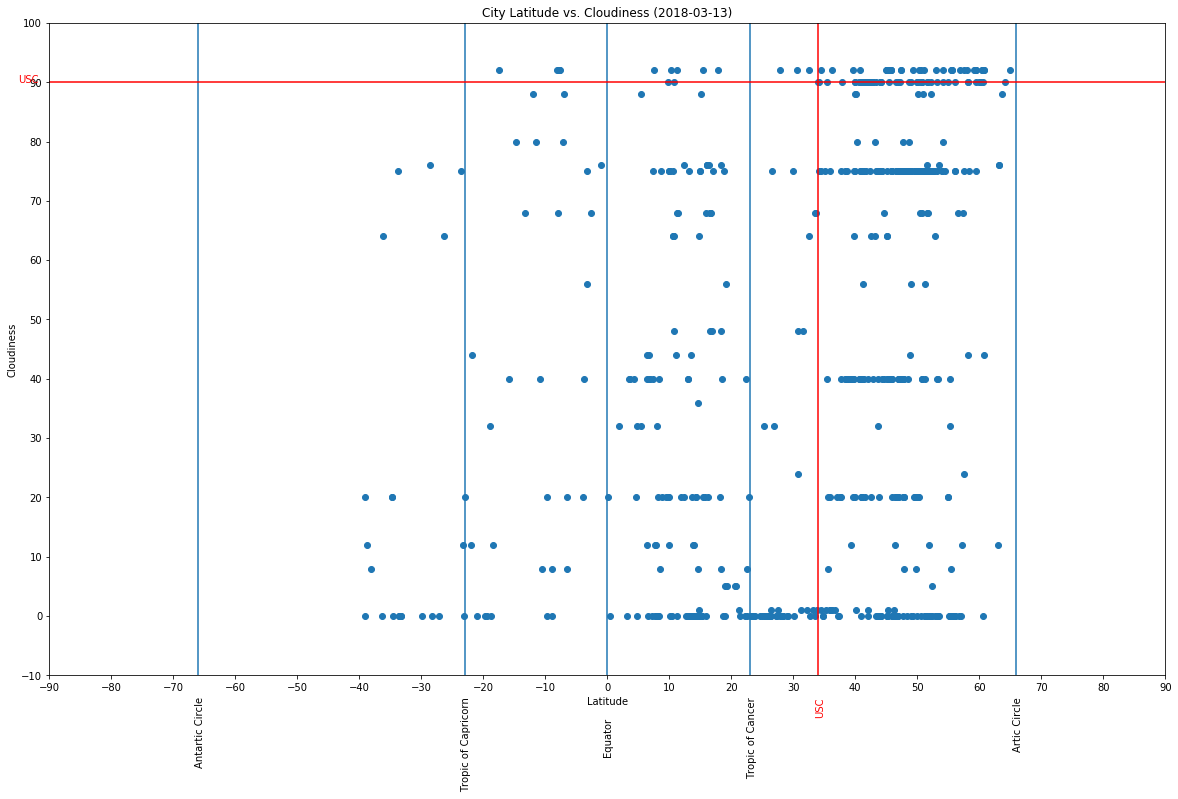

In [30]:
plt.figure(figsize=(20,12))
x_axis = list(df_weather['Lat'])
y_axis = list(df_weather['Cloudiness'])
plt.scatter(x_axis, y_axis)

# Format axis.
plt.xticks(np.arange(-90,100,10))
plt.yticks(np.arange(-10, 110, 10))

# Add labels
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title('City Latitude vs. Cloudiness (' + date_str + ')')

# Draw major latitudes.
xcoords = [66, 23, 0, -23, -66]
for xc in xcoords:
    plt.axvline(x=xc)    
plt.text(65.5, -15, 'Artic Circle', rotation=90)
plt.text(22.5, -15, 'Tropic of Cancer', rotation=90)
plt.text(-0.5, -15, 'Equator       ', rotation=90)
plt.text(-23.5, -15, 'Tropic of Capricorn', rotation=90)
plt.text(-66.5, -15, 'Antartic Circle', rotation=90)

# University of Southern California
plt.axvline(USC.get('Lat'), color='red')    
plt.text(USC.get('Lat') - 0.5, -15, 'USC', rotation=90, color='red')
plt.axhline(USC.get('Cloudiness'), color='red')
plt.text(-95, USC.get('Cloudiness') -0.1, 'USC', color='red')


plt.show()

<h2>Latitude vs. Wind Speed Plot

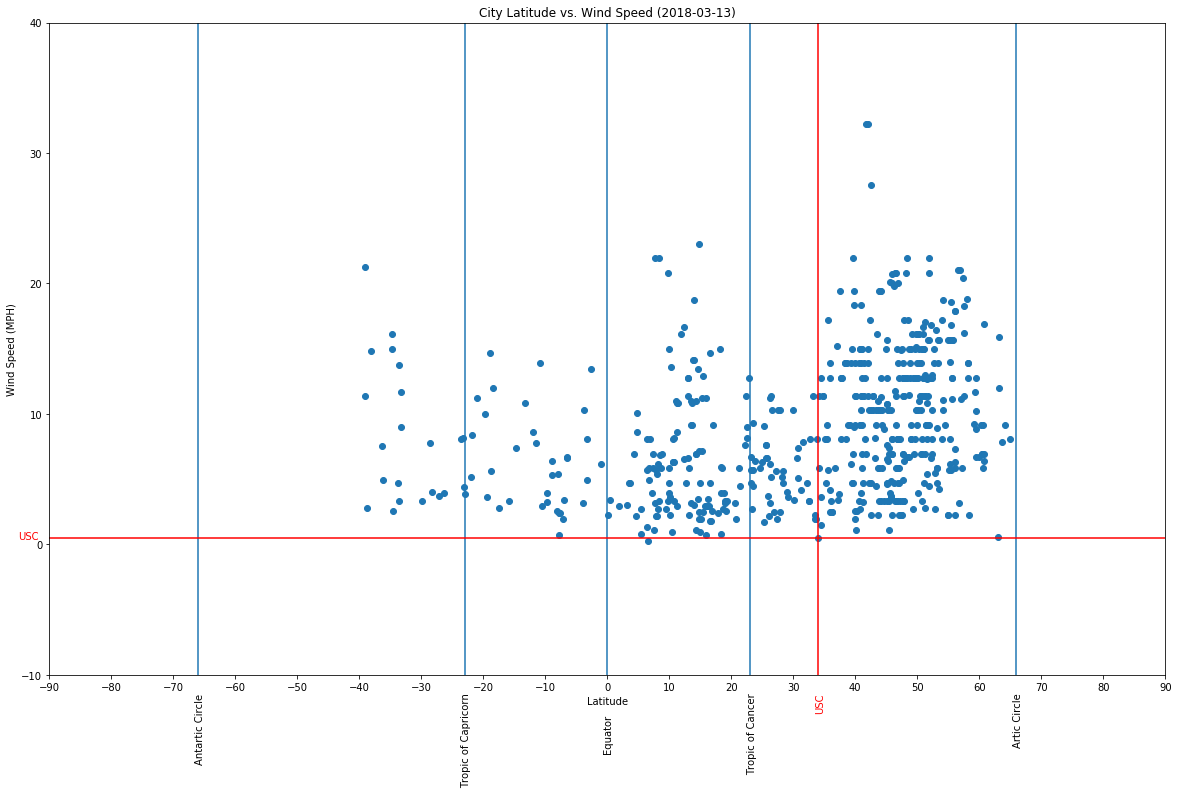

In [31]:
plt.figure(figsize=(20,12))
x_axis = list(df_weather['Lat'])
y_axis = list(df_weather['Wind Speed'])
plt.scatter(x_axis, y_axis)

# Format axis
plt.xticks(np.arange(-90,100,10))
plt.yticks(np.arange(-10, 50, 10))

plt.xlabel('Latitude')
plt.ylabel('Wind Speed (MPH)')
plt.title('City Latitude vs. Wind Speed (' + date_str + ')')


# Draw major latitudes.
xcoords = [66, 23, 0, -23, -66]
for xc in xcoords:
    plt.axvline(x=xc)    
plt.text(65.5, -12, 'Artic Circle', rotation=90)
plt.text(22.5, -12, 'Tropic of Cancer', rotation=90)
plt.text(-0.5, -12, 'Equator       ', rotation=90)
plt.text(-23.5, -12, 'Tropic of Capricorn', rotation=90)
plt.text(-66.5, -12, 'Antartic Circle', rotation=90)

# University of Southern California
plt.axvline(USC.get('Lat'), color='red')    
plt.text(USC.get('Lat') - 0.5, -12, 'USC', rotation=90, color='red')
plt.axhline(USC.get('Wind Speed'), color='red')
plt.text(-95, USC.get('Wind Speed') -0.1, 'USC', color='red')


plt.show()